## AdventureWorks Customer Classification Challenge

AdventureWorks is a bike store. They provide historical data on their customers. The challenge is to predict whether a certain customer, given demographic factors, would be an AdventureWorks client.

This notebooke was originally built as the final exam for EdX DAT275x.

## Data and Descriptors

AdvWorksCusts.csv  
Customer demographic data consisting of the following fields:  
·        CustomerID (integer): A unique customer identifier.  
·        Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)  
·        FirstName (string): The customer's first name.  
·        MiddleName (string): The customer's middle name.  
·        LastName (string): The customer's last name.  
·        Suffix (string): A suffix for the customer name (Jr, Sr, etc.)  
·        AddressLine1 (string): The first line of the customer's home address.  
·        AddressLine2 (string): The second line of the customer's home address.  
·        City (string): The city where the customer lives.  
·        StateProvince (string): The state or province where the customer lives.  
·        CountryRegion (string): The country or region where the customer lives.  
·        PostalCode (string): The postal code for the customer's address.  
·        PhoneNumber (string): The customer's telephone number.  
·        BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.  
·        Education (string): The maximum level of education achieved by the customer:  
Partial High School  
High School  
Partial College  
Bachelors  
Graduate Degree  
·        Occupation (string): The type of job in which the customer is employed:  
Manual  
Skilled Manual  
Clerical  
Management  
Professional  
·        Gender (string): The customer's gender (for example, M for male, F for female, etc.)  
·        MaritalStatus (string): Whether the customer is married (M) or single (S).  
·        HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).  
·        NumberCarsOwned (integer): The number of cars owned by the customer.  
·        NumberChildrenAtHome (integer): The number of children the customer has who live at home.  
·        TotalChildren (integer): The total number of children the customer has.  
·        YearlyIncome (decimal): The annual income of the customer.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [3]:
AWCust = pd.read_csv('FinalExam/AdvWorksCusts_lite.csv')
# this lite file has already been cleaned up of duplicates and missing data

In [4]:
print(AWCust.shape)
AWCust.head(20)

(16404, 12)


,CustomerID,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,31.8,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,32.7,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,32.4,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,29.9,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,29.4,Bachelors,Professional,F,S,1,4,5,5,92771,1
5,11005,32.4,Bachelors,Professional,M,S,1,1,0,0,103199,1
6,11006,32.1,Bachelors,Professional,F,S,1,1,0,0,84756,1
7,11007,33.7,Bachelors,Professional,M,M,1,2,3,3,109759,1
8,11008,33.5,Bachelors,Professional,F,S,1,3,4,4,88005,1
9,11009,33.8,Bachelors,Professional,M,S,0,1,0,0,106399,0


In [5]:
AWCust.describe()

,CustomerID,Age,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,35.976292,0.674104,1.499756,0.991100,2.004511,78129.672397,0.332297
std,5340.370705,11.252260,0.468723,1.139135,1.514278,1.682318,39728.383493,0.471051
min,11000.000000,17.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,0.000000
25%,15617.750000,27.300000,0.000000,1.000000,0.000000,0.000000,47808.750000,0.000000
50%,20231.500000,34.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,0.000000
75%,24862.250000,43.300000,1.000000,2.000000,2.000000,3.000000,105211.750000,1.000000
max,29482.000000,87.400000,1.000000,4.000000,5.000000,5.000000,196511.000000,1.000000


In [6]:
AWCust.dtypes

CustomerID                int64
Age                     float64
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
BikeBuyer                 int64
dtype: object

In [ ]:
# AWCust.describe()
# okay this is good now

In [7]:
# check for balance
print(AWCust.groupby('BikeBuyer').count())

           CustomerID    Age  Education  Occupation  Gender  MaritalStatus  \
BikeBuyer                                                                    
0               10953  10953      10953       10953   10953          10953   
1                5451   5451       5451        5451    5451           5451   

           HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
BikeBuyer                                                         
0                  10953            10953                 10953   
1                   5451             5451                  5451   

           TotalChildren  YearlyIncome  
BikeBuyer                               
0                  10953         10953  
1                   5451          5451  


In [8]:
# use OneHot to convert categoricals to binary dummies

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Occupation', 'Gender', 'MaritalStatus']

# Create the first Features table
Features = encode_string(AWCust['Education'])

for col in categorical_columns:
    temp = encode_string(AWCust[col])
    Features = np.concatenate([Features, temp], axis = 1)

Features = np.concatenate([Features, np.array(AWCust[['Age', 'HomeOwnerFlag',
                                                    'NumberCarsOwned', 'NumberChildrenAtHome',
                                                    'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(16404, 20)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 3.18000e+01 1.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 1.37947e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 3.27000e+01 0.00000e+00 1.00000e+00 3.00000e+00
  3.00000e+00 1.01141e+05]]


In [9]:
# Create a set of labels and look at it

labels = np.array(AWCust['BikeBuyer'])
print(labels)

[0 1 0 ... 1 0 0]


In [10]:
## Randomly sample cases to create independent training and test data

nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

scaler = preprocessing.StandardScaler().fit(X_train[:,19:])
X_train[:,19:] = scaler.transform(X_train[:,19:])
X_test[:,19:] = scaler.transform(X_test[:,19:])
X_train[:2,]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        , 42.7       ,
         1.        ,  1.        ,  0.        ,  1.        , -0.3076373 ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        , 47.4       ,
         0.        ,  4.        ,  5.        ,  5.        ,  1.84891454]])

In [11]:
# build logistic regression model using training data

logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.22268257]
[[ 0.29554591  0.12937738 -0.20007839  0.01810925 -0.46563672 -0.01534694
  -0.52160601  0.13406603  0.07027136  0.109933   -0.43398133  0.21129876
  -0.87204246  0.64935989 -0.03531213  0.10422722 -0.05455845  0.7310091
   0.03347332  0.55546373]]


In [12]:
# apply the model to the test data

probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.86323376 0.13676624]
 [0.97604595 0.02395405]
 [0.84514971 0.15485029]
 [0.85926367 0.14073633]
 [0.48749184 0.51250816]
 [0.93031245 0.06968755]
 [0.94636403 0.05363597]
 [0.93512273 0.06487727]
 [0.82068758 0.17931242]
 [0.72062207 0.27937793]
 [0.85671748 0.14328252]
 [0.59286088 0.40713912]
 [0.92219351 0.07780649]
 [0.85630269 0.14369731]
 [0.89110225 0.10889775]]


In [13]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

# examine the first fifteen elements visually

print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]


In [14]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 


                 Confusion matrix
                 Score positive    Score negative
Actual positive      2963               331
Actual negative       759               947

Accuracy  0.78
 
           Positive      Negative
Num case     3294          1706
Precision    0.80          0.74
Recall       0.90          0.56
F1           0.84          0.63


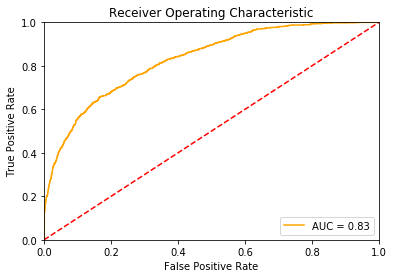

In [15]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

In [16]:
# adjust class weights to represent lower cost of false negative

logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.83556432 0.16443568]
 [0.97133231 0.02866769]
 [0.81806031 0.18193969]
 [0.83297978 0.16702022]
 [0.43861074 0.56138926]
 [0.91759608 0.08240392]
 [0.93625903 0.06374097]
 [0.92190354 0.07809646]
 [0.78923881 0.21076119]
 [0.67965909 0.32034091]
 [0.83211795 0.16788205]
 [0.54605155 0.45394845]
 [0.90644812 0.09355188]
 [0.82702102 0.17297898]
 [0.87069987 0.12930013]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive      2874               420
Actual negative       684              1022

Accuracy  0.78
 
           Positive      Negative
Num case     3294          1706
Precision    0.81          0.71
Recall       0.87          0.60
F1           0.84          0.65


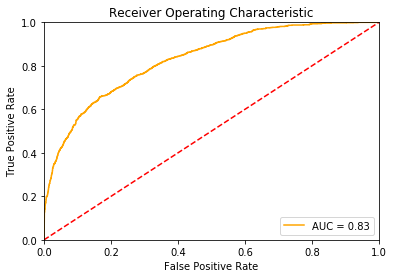

In [18]:
# test again with new weights

scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

In [19]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

# test for a series of weights to find optimal balance for accuracy and confusion matrix
    
thresholds = [0.8, 0.7, 0.6, 0.5, 0.40, 0.3, 0.2]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.8
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3223                71
Actual negative      1206               500

Accuracy  0.74
 
           Positive      Negative
Num case     3294          1706
Precision    0.73          0.88
Recall       0.98          0.29
F1           0.83          0.44

For threshold = 0.7
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3143               151
Actual negative      1003               703

Accuracy  0.77
 
           Positive      Negative
Num case     3294          1706
Precision    0.76          0.82
Recall       0.95          0.41
F1           0.84          0.55

For threshold = 0.6
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3029               265
Actual negative       853               853

Accuracy  0.78
 
           Positive      Negative
Num case 

In [20]:
# read in the exam file with customer demographics

AWlive = pd.read_csv('FinalExam-Test/AW_test_lite.csv')


In [21]:
print(AWlive.shape)
AWlive.head(20)

(500, 11)


,CustomerID,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,53.02,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,33.27,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,64.01,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,39.30,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,32.81,High School,Manual,F,M,1,1,2,2,21876
5,16375,40.39,Partial College,Clerical,F,M,1,1,0,1,44467
6,16109,33.52,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,15606,33.08,Bachelors,Professional,M,M,1,3,4,4,99418
8,20888,31.97,Partial High School,Manual,M,S,1,1,4,4,13522
9,20716,24.32,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [22]:
AWlive.dtypes

CustomerID                int64
Age                     float64
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
dtype: object

In [28]:
# use OneHot to convert categoricals to binary dummies

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Occupation', 'Gender', 'MaritalStatus']

# Create the first Features table
Features_live = encode_string(AWlive['Education'])

for col in categorical_columns:
    temp = encode_string(AWlive[col])
    Features_live = np.concatenate([Features_live, temp], axis = 1)
    
Features_live = np.concatenate([Features_live, np.array(AWlive[['Age', 'HomeOwnerFlag',
                                                    'NumberCarsOwned', 'NumberChildrenAtHome',
                                                    'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features_live.shape)
print(Features_live[:2, :])   

(500, 20)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 5.30200e+01 0.00000e+00 2.00000e+00 0.00000e+00
  5.00000e+00 8.69310e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 3.32700e+01 1.00000e+00 2.00000e+00 2.00000e+00
  4.00000e+00 1.00125e+05]]


In [29]:
# money maker
Features_live[:,19:] = scaler.transform(Features_live[:,19:])

In [30]:
realprobabilities = logistic_mod.predict_proba(Features_live)
print(realprobabilities[:15,:])

[[0.85165174 0.14834826]
 [0.38844715 0.61155285]
 [0.97062903 0.02937097]
 [0.70906617 0.29093383]
 [0.85228593 0.14771407]
 [0.95825026 0.04174974]
 [0.16255633 0.83744367]
 [0.13946076 0.86053924]
 [0.1687925  0.8312075 ]
 [0.80328378 0.19671622]
 [0.57654204 0.42345796]
 [0.93202818 0.06797182]
 [0.92825717 0.07174283]
 [0.96441319 0.03558681]
 [0.70209104 0.29790896]]


In [34]:
realscores = score_model(realprobabilities, 0.5)
print(np.array(realscores[:15]))

# examine for sanity, should not be all 1 or 0

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]


In [54]:
# concat customerID and prediction for whether they will be a customer or not
Results = np.column_stack([np.array(AWlive[['CustomerID']]), np.array(realscores)])

In [55]:
print(Results)

[[18988     0]
 [29135     1]
 [12156     0]
 [13749     0]
 [27780     0]
 [16375     0]
 [16109     1]
 [15606     1]
 [20888     1]
 [20716     0]
 [21311     0]
 [21741     0]
 [20101     0]
 [28302     0]
 [14515     0]
 [11674     0]
 [11539     0]
 [14290     0]
 [20615     1]
 [14818     1]
 [26973     0]
 [17825     0]
 [15133     1]
 [22334     0]
 [26530     0]
 [15411     0]
 [24792     0]
 [18812     1]
 [27688     1]
 [14513     0]
 [28847     1]
 [11168     1]
 [18336     0]
 [14382     0]
 [28882     1]
 [23238     1]
 [19098     1]
 [15295     0]
 [12347     0]
 [20655     0]
 [28156     0]
 [20907     1]
 [22162     0]
 [17782     0]
 [25307     0]
 [14641     0]
 [12477     0]
 [18593     1]
 [22718     1]
 [11377     0]
 [18875     0]
 [21972     1]
 [13420     0]
 [19205     0]
 [15966     0]
 [16311     0]
 [26497     0]
 [27508     1]
 [20403     0]
 [12728     0]
 [26965     0]
 [26248     0]
 [18078     0]
 [15376     1]
 [28529     0]
 [16104     1]
 [13633   